# Plots the DFT interaction energy of the combined hBN-water system as a function of sheet-to-oxygen distance h.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
def make_df_dft(data_path, ryd_per_ev=0.0734986176, mev_per_ev=1000):
    df = pd.read_table(
        data_path,
        delim_whitespace=True,
        header=None,
        names=[
            "system",
            "functional",
            "ecp",
            "ecut_ev",
            "Nk",
            "Ns",
            "total_energy_ryd",
        ],
    )
    df["total_energy_ev"] = df["total_energy_ryd"].values / ryd_per_ev
    df["total_energy_mev"] = df["total_energy_ev"].values * mev_per_ev
    return df


def make_df_rpa_int_energies(data_path):
    df = pd.read_table(
        data_path,
        delim_whitespace=True,
        header=None,
        names=[
            "system",
            "method",
            "int_energy_mev",
        ],
    )
    systems = df["system"].values
    df["h"] = [float(system.split("_")[-1]) for system in systems]
    df["system_without_h"] = ["_".join(system.split("_")[:-2]) for system in systems]
    return df


def gather_ref_energies(df):
    hBN_ref_energy = df[df.system == "hBN"]["total_energy_mev"].values[0]
    water_Oup_Hdown_ref_energy = df[df.system == "water_Oup_Hdown"][
        "total_energy_mev"
    ].values[0]
    return hBN_ref_energy, water_Oup_Hdown_ref_energy


def make_df_dft_int_energies(df_dft):
    df_dft_full_system = df_dft[(df_dft.system != "hBN") & (df_dft.system != "water_Oup_Hdown")].copy()
    df_dft_int_energies = pd.DataFrame({})
    df_dft_int_energies["method"] = [
        f"dft-{functional}" for functional in df_dft_full_system["functional"].values
    ]
    df_dft_int_energies["system"] = df_dft_full_system["system"].values
    df_dft_int_energies["h"] = [
        float(system.split("_")[-1]) for system in df_dft_int_energies["system"].values
    ]
    df_dft_int_energies["system_without_h"] = [
        "_".join(system.split("_")[:-2])
        for system in df_dft_int_energies["system"].values
    ]
    df_dft_int_energies["int_energy_mev"] = [0] * df_dft_full_system[
        "total_energy_mev"
    ].values.shape[
        0
    ]  # Dummy values
    for functional in df_dft_full_system["functional"].values:
        hBN_ref_energy, water_Oup_Hdown_ref_energy = gather_ref_energies(
            df_dft[df_dft.functional == functional]
        )
        df_dft_int_energies.loc[df_dft_int_energies.method == f"dft-{functional}", "int_energy_mev"] = (
            df_dft_full_system[df_dft_full_system.functional == functional][
                "total_energy_mev"
            ].values
            - hBN_ref_energy
            - water_Oup_Hdown_ref_energy
        )
    return df_dft_int_energies


def add_color_code(
    row,
    color_code={
        "rpa": "k",
        "dft-pbe": "r",
        "dft-pbe-d2": "r",
        "dft-pbe0": "b",
        "dft-pbe0-d2": "b",
    },
):
    for method in color_code:
        if row == method:
            return color_code[method]


def plot_int_energy(df):
    system = df.system_without_h.values[0]
    plt.figure(figsize=(7, 5))
    plt.title(f"Interaction energy curve for {system}")
    plt.xlabel("Sheet-to-oxygen distance h (A)")
    plt.ylabel(r"$\Delta E_{int}$ (meV)")
    for method in df.method.unique():
        data = df[(df.system_without_h == system) & (df.method == method)].copy()
        if not data.empty:
            if "d2" in method:
                line_style = "-x"
            else:
                line_style = "-o"
            plt.plot(
                "h",
                "int_energy_mev",
                line_style,
                data=data,
                color=data["color"].values[0],
                label=method,
            )
    plt.axhline(y=0, linestyle="--", color="k")
    plt.legend()
    save_path = f"/Users/Nathan/Desktop/{system}_int_energy_plot.png"
    print(f"Saving png file to {save_path}")
    plt.savefig(save_path, dpi=300, bbox_inches="tight")

In [143]:
dft_data_path = "dft_total_energy_data.txt"
df_dft = make_df_dft(dft_data_path)
df_dft

,system,functional,ecp,ecut_ev,Nk,Ns,total_energy_ryd,total_energy_ev,total_energy_mev
0,hBN_water_Oup_Hdown_h_2.9907,pbe0,hgh,1000,2,3,-957.328407,-13025.121268,-1.302512e+07
1,hBN_water_Oup_Hdown_h_3.1944,pbe0,hgh,1000,2,3,-957.331346,-13025.161247,-1.302516e+07
2,hBN_water_Oup_Hdown_h_3.3889,pbe0,hgh,1000,2,3,-957.332741,-13025.180237,-1.302518e+07
3,hBN_water_Oup_Hdown_h_3.5926,pbe0,hgh,1000,2,3,-957.332862,-13025.181874,-1.302518e+07
4,hBN_water_Oup_Hdown_h_3.7963,pbe0,hgh,1000,2,3,-957.332845,-13025.181645,-1.302518e+07
5,hBN_water_Oup_Hdown_h_4.5000,pbe0,hgh,1000,2,3,-957.332126,-13025.171870,-1.302517e+07
6,hBN_water_Oup_Hdown_h_5.0093,pbe0,hgh,1000,2,3,-957.331679,-13025.165784,-1.302517e+07
7,hBN_water_Oup_Hdown_h_6.0093,pbe0,hgh,1000,2,3,-957.331461,-13025.162816,-1.302516e+07
8,hBN,pbe0,hgh,1000,2,3,-923.323604,-12562.462188,-1.256246e+07
9,water_Oup_Hdown,pbe0,hgh,1000,2,1,-34.007791,-462.699739,-4.626997e+05


In [144]:
rpa_data_path = "rpa_interaction_energy_data.txt"
df_dft_int_energies = make_df_dft_int_energies(df_dft)
df_int_energies = pd.concat(
    [df_dft_int_energies, make_df_rpa_int_energies(rpa_data_path)], sort=False,
)
df_int_energies["color"] = df_int_energies["method"].apply(add_color_code)
df_int_energies = df_int_energies[
    df_int_energies.system_without_h == "hBN_water_Oup_Hdown"
]
df_int_energies

,method,system,h,system_without_h,int_energy_mev,color
0,dft-pbe0,hBN_water_Oup_Hdown_h_2.9907,2.9907,hBN_water_Oup_Hdown,40.660084,g
1,dft-pbe0,hBN_water_Oup_Hdown_h_3.1944,3.1944,hBN_water_Oup_Hdown,0.680965,g
2,dft-pbe0,hBN_water_Oup_Hdown_h_3.3889,3.3889,hBN_water_Oup_Hdown,-18.309596,g
3,dft-pbe0,hBN_water_Oup_Hdown_h_3.5926,3.5926,hBN_water_Oup_Hdown,-19.946089,g
4,dft-pbe0,hBN_water_Oup_Hdown_h_3.7963,3.7963,hBN_water_Oup_Hdown,-19.716833,g
5,dft-pbe0,hBN_water_Oup_Hdown_h_4.5000,4.5000,hBN_water_Oup_Hdown,-9.942636,g
6,dft-pbe0,hBN_water_Oup_Hdown_h_5.0093,5.0093,hBN_water_Oup_Hdown,-3.856535,g
7,dft-pbe0,hBN_water_Oup_Hdown_h_6.0093,6.0093,hBN_water_Oup_Hdown,-0.888044,g
8,dft-pbe,hBN_water_Oup_Hdown_h_2.9907,2.9907,hBN_water_Oup_Hdown,37.952687,b
9,dft-pbe,hBN_water_Oup_Hdown_h_3.1944,3.1944,hBN_water_Oup_Hdown,-3.080466,b


In [147]:
data_path = "all_interaction_energy_data.txt"
df_int_energies.to_csv(data_path, header=None, index=None, sep=" ", mode="w")

Saving png file to /Users/Nathan/Desktop/hBN_water_Oup_Hdown_int_energy_plot.png


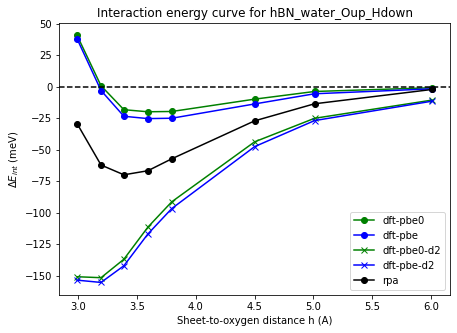

In [146]:
plot_int_energy(df_int_energies)